<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
MPB Tutorial: Bandstructure of Periodic Dielectric Waveguides

</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>February, 2025</font></center>

***

In [36]:
import matplotlib.pyplot as plt
import numpy as np

import meep as mp
from meep import mpb

# rc('text', usetex=True)
plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'

We simulate the structure of Fig. 2 in Chap. 8 of the book, `Photonic Crystals-Molding the Flow of Light`.

# Rod slab 
A square lattice of dielectric rods in air.

In [37]:
resolution = 20   # pixels/a

a = 0.500         # units of um
r = 0.2*a         # units of um
h = 2.0*a         # units of um

r = r/a           # units of "a"
h = h/a           # units of "a"

n_rod = np.sqrt(5)
Rod = mp.Medium(index=n_rod)

In [38]:
geometry_lattice = mp.Lattice(size=mp.Vector3(1,1,4))

geometry = [ mp.Block(center=mp.Vector3(), size=mp.Vector3(mp.inf,mp.inf,h), material=mp.air),
             mp.Cylinder(center=mp.Vector3(), radius=r, height=mp.inf, material=Rod) ]

num_k = 10
k_points_Gamma2X = mp.interpolate(num_k, [mp.Vector3(0,0,0), mp.Vector3(0.5,0,0)])
k_points_X2M = mp.interpolate(num_k, [mp.Vector3(0.5,0,0), mp.Vector3(0.5,0.5,0)])
k_points_M2Gamma = mp.interpolate(int(num_k*np.sqrt(2)), [mp.Vector3(0.5,0.5,0), mp.Vector3(0,0,0)])
k_points = k_points_Gamma2X[:-1] + k_points_X2M[:-1] + k_points_M2Gamma


# k_parallel = np.zeros(len(k_points))
# k_parallel= np.linspace(0, 1/2, len(k_points))

num_bands = 5

ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands)

In [39]:
k_points, len(k_points)

([Vector3<0.0, 0.0, 0.0>,
  Vector3<0.045454545454545456, 0.0, 0.0>,
  Vector3<0.09090909090909091, 0.0, 0.0>,
  Vector3<0.13636363636363635, 0.0, 0.0>,
  Vector3<0.18181818181818182, 0.0, 0.0>,
  Vector3<0.2272727272727273, 0.0, 0.0>,
  Vector3<0.2727272727272727, 0.0, 0.0>,
  Vector3<0.3181818181818182, 0.0, 0.0>,
  Vector3<0.36363636363636365, 0.0, 0.0>,
  Vector3<0.4090909090909091, 0.0, 0.0>,
  Vector3<0.4545454545454546, 0.0, 0.0>,
  Vector3<0.5, 0.0, 0.0>,
  Vector3<0.5, 0.045454545454545456, 0.0>,
  Vector3<0.5, 0.09090909090909091, 0.0>,
  Vector3<0.5, 0.13636363636363635, 0.0>,
  Vector3<0.5, 0.18181818181818182, 0.0>,
  Vector3<0.5, 0.2272727272727273, 0.0>,
  Vector3<0.5, 0.2727272727272727, 0.0>,
  Vector3<0.5, 0.3181818181818182, 0.0>,
  Vector3<0.5, 0.36363636363636365, 0.0>,
  Vector3<0.5, 0.4090909090909091, 0.0>,
  Vector3<0.5, 0.4545454545454546, 0.0>,
  Vector3<0.5, 0.5, 0.0>,
  Vector3<0.4666666666666667, 0.4666666666666667, 0.0>,
  Vector3<0.43333333333333335, 0.4

In [40]:
ms.run_zeven()
zeven_freqs = ms.all_freqs

ms.run_zodd()
zodd_freqs = ms.all_freqs


Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 20 x 20 x 80.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 4)
Cell volume = 4
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 12 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zeven.
Initializing fields to random numbers...
38 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.045454545454545456, 0.0, 0.0>
  Vector3<0.09090909090909091, 0.0, 0.0>
  Vector3<0.13636363636363635, 0.0, 0.0>
  Vector3<0.18181818181818182, 0.0, 0.0>
  Vector3<0.2272727272727

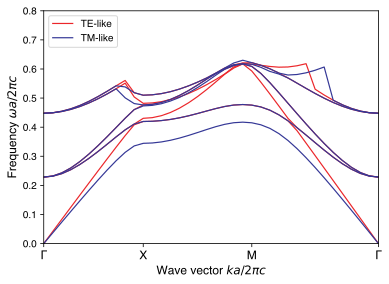

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.2))

x = range(len(zeven_freqs))
linewidth = 1.2
for i in range(zeven_freqs.shape[1]):
    if i==0:
        ax.plot(x, zeven_freqs[:,i], color='#EB262A', linestyle='-', lw=linewidth, label='TE-like', zorder=1)
        ax.plot(x, zodd_freqs[:,i], color='#343796', linestyle='-', lw=linewidth, label='TM-like', zorder=2)
    else:
        ax.plot(x, zeven_freqs[:,i], color='#EB262A', linestyle='-', lw=linewidth, zorder=1)
        ax.plot(x, zodd_freqs[:,i], color='#343796', linestyle='-', lw=linewidth, zorder=2)
        # ax.plot(x, yodd_zeven_freqs[:,i], 'o',color='r', markerfacecolor="none", ms=3)
# ax.plot([x[0], x[-1]], [0, 0.5], color='#000000', linestyle='-', lw=2, zorder=5)
# ax.fill_between(x, k_parallel/1, 0.8, facecolor='#9D9CCC', alpha=1, zorder=5)

ax.set_ylim([0, .8])
ax.set_xlim([x[0], x[-1]])

tick_locs = [0, 
             len(k_points_Gamma2X) - 1, 
             2*len(k_points_Gamma2X) - 1, 
             len(k_points) - 1]
tick_labs = [r"$\Gamma$", "X", "M", r"$\Gamma$"]
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=12)
ax.set_xlabel("Wave vector $ka/2\pi c$", size=12)
ax.set_ylabel(r"Frequency $\omega a/2\pi c$", size=12)
ax.legend(loc=2)
# ax.text(2, 0.42, "Light Cone", color="w", zorder=6, size=15)

plt.show()

# Hole slab
A triangular lattice of air holes in dielectric.